In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader
import os
from data_loader import dataset_cifar10
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
cifar = dataset_cifar10(batch_size=512)
train_loader = cifar.loader(train_flag=True)
test_loader = cifar.loader(train_flag=False)

CUDA available:  True
mps:  False
Files already downloaded and verified
Files already downloaded and verified


In [ ]:
cifar.data_summary_stats()

Files already downloaded and verified
Files already downloaded and verified
(60000, 32, 32, 3)
[0.49186878 0.48265391 0.44717728]
[0.24697121 0.24338894 0.26159259]


In [ ]:
len(train_loader),len(test_loader)

(98, 20)

In [ ]:
98*512, 20*512

(50176, 10240)

In [ ]:
50176+ 10240

60416

Files already downloaded and verified


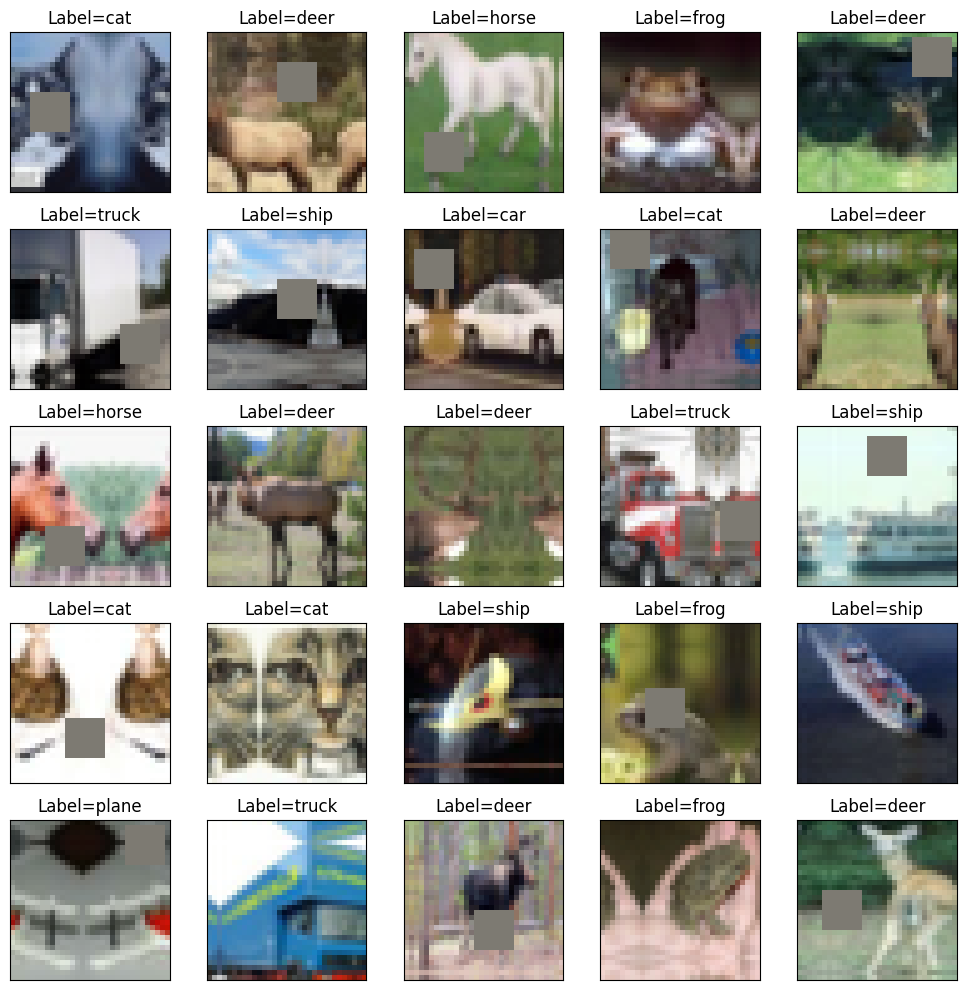

In [3]:
cifar.sample_pictures(train_flag=True)

In [3]:
from custom_resnet import Net

In [4]:
from torchsummary import summary
from custom_resnet import Net
SEED = 4

device = torch.device("cpu")
if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps")

print("Using device:", device)

# Move model to device
model = Net().to(device)

# Generate summary
summary(model, input_size=(3, 32, 32))


Using device: cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
                 X-8          [-1, 128, 16, 16]               0
            Conv2d-9          [-1, 128, 16, 16]         147,456
      BatchNorm2d-10          [-1, 128, 16, 16]             256
             ReLU-11          [-1, 128, 16, 16]               0
           Conv2d-12          [-1, 128, 16, 16]         147,456
      BatchNorm2d-13          [-1, 128, 16, 16]             256
             ReLU-14

In [ ]:
! pip install torch-lr-finder

  0%|          | 0/100 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.59E-03


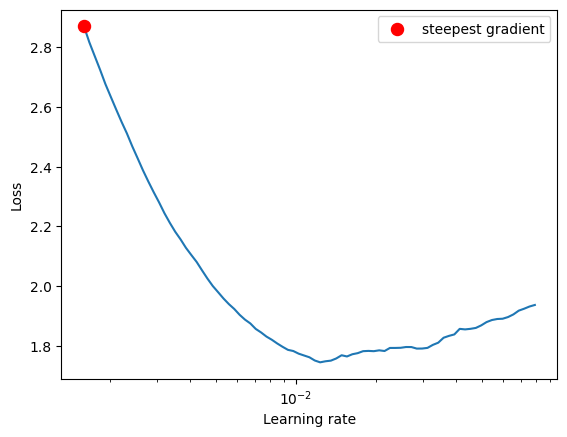

<Axes: xlabel='Learning rate', ylabel='Loss'>

In [8]:
import copy
from torch_lr_finder import LRFinder
import torch.nn as nn
import numpy as np


net_exp = copy.deepcopy(Net())
optimizer = torch.optim.Adam(net_exp.parameters(), lr=1e-3, weight_decay=0.01)
criterion = nn.CrossEntropyLoss()
lr_finder = LRFinder(net_exp, optimizer, criterion, device=device)
lr_finder.range_test(train_loader, end_lr=0.1, num_iter=100, step_mode="exp")
lr_finder.plot()


In [5]:
import torch.optim as optim
import torch.nn as nn
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1.59e-04) #, momentum=0.85)
#scheduler = StepLR(optimizer, step_size=6, gamma=0.2)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer,
                                                max_lr=1.59e-03,
                                                steps_per_epoch=len(train_loader),
                                                epochs=24,
                                                pct_start=0.2,
                                                div_factor=10,
                                                three_phase=False,
                                                final_div_factor=50,
                                                anneal_strategy='linear'
                                                ) #final_div_factor=100,


In [6]:

# Load train and test model
from main import *

train = train()
test = test()

EPOCHS= 24


for epoch in range(EPOCHS):  # loop over the dataset multiple times
  #train.execute(net, device, batch, optimizer, criterion, epoch)
  train.execute(model, device, train_loader, optimizer, scheduler, criterion, epoch)
  test.execute(model, device, test_loader, criterion)

print('Finished Training')

Epoch: 0,Loss=1.25 Batch_id=97 Accuracy=45.42: 100%|██████████| 98/98 [00:23<00:00,  4.14it/s]


Test set: Average loss: 0.0024, Accuracy: 5731/10000 (57.31%)



Epoch: 1,Loss=1.02 Batch_id=97 Accuracy=61.35: 100%|██████████| 98/98 [00:22<00:00,  4.40it/s]


Test set: Average loss: 0.0019, Accuracy: 6680/10000 (66.80%)



Epoch: 2,Loss=0.84 Batch_id=97 Accuracy=68.30: 100%|██████████| 98/98 [00:23<00:00,  4.20it/s]


Test set: Average loss: 0.0019, Accuracy: 6800/10000 (68.00%)



Epoch: 3,Loss=0.69 Batch_id=97 Accuracy=73.26: 100%|██████████| 98/98 [00:22<00:00,  4.39it/s]


Test set: Average loss: 0.0014, Accuracy: 7489/10000 (74.89%)



Epoch: 4,Loss=0.67 Batch_id=97 Accuracy=76.67: 100%|██████████| 98/98 [00:22<00:00,  4.31it/s]


Test set: Average loss: 0.0012, Accuracy: 7910/10000 (79.10%)



Epoch: 5,Loss=0.60 Batch_id=97 Accuracy=79.53: 100%|██████████| 98/98 [00:22<00:00,  4.36it/s]


Test set: Average loss: 0.0011, Accuracy: 8137/10000 (81.37%)



Epoch: 6,Loss=0.49 Batch_id=97 Accuracy=81.82: 100%|██████████| 98/98 [00:22<00:00,  4.35it/s]


Test set: Average loss: 0.0011, Accuracy: 8116/10000 (81.16%)



Epoch: 7,Loss=0.45 Batch_id=97 Accuracy=84.18: 100%|██████████| 98/98 [00:22<00:00,  4.34it/s]


Test set: Average loss: 0.0009, Accuracy: 8493/10000 (84.93%)



Epoch: 8,Loss=0.49 Batch_id=97 Accuracy=85.47: 100%|██████████| 98/98 [00:22<00:00,  4.43it/s]


Test set: Average loss: 0.0010, Accuracy: 8313/10000 (83.13%)



Epoch: 9,Loss=0.40 Batch_id=97 Accuracy=86.50: 100%|██████████| 98/98 [00:22<00:00,  4.32it/s]


Test set: Average loss: 0.0008, Accuracy: 8592/10000 (85.92%)



Epoch: 10,Loss=0.30 Batch_id=97 Accuracy=87.35: 100%|██████████| 98/98 [00:23<00:00,  4.22it/s]


Test set: Average loss: 0.0008, Accuracy: 8679/10000 (86.79%)



Epoch: 11,Loss=0.33 Batch_id=97 Accuracy=88.27: 100%|██████████| 98/98 [00:23<00:00,  4.23it/s]


Test set: Average loss: 0.0008, Accuracy: 8671/10000 (86.71%)



Epoch: 12,Loss=0.34 Batch_id=97 Accuracy=89.34: 100%|██████████| 98/98 [00:23<00:00,  4.17it/s]


Test set: Average loss: 0.0007, Accuracy: 8773/10000 (87.73%)



Epoch: 13,Loss=0.30 Batch_id=97 Accuracy=90.07: 100%|██████████| 98/98 [00:23<00:00,  4.22it/s]


Test set: Average loss: 0.0007, Accuracy: 8850/10000 (88.50%)



Epoch: 14,Loss=0.25 Batch_id=97 Accuracy=90.90: 100%|██████████| 98/98 [00:23<00:00,  4.22it/s]


Test set: Average loss: 0.0007, Accuracy: 8832/10000 (88.32%)



Epoch: 15,Loss=0.25 Batch_id=97 Accuracy=91.59: 100%|██████████| 98/98 [00:23<00:00,  4.24it/s]


Test set: Average loss: 0.0006, Accuracy: 8993/10000 (89.93%)



Epoch: 16,Loss=0.22 Batch_id=97 Accuracy=92.18: 100%|██████████| 98/98 [00:22<00:00,  4.28it/s]


Test set: Average loss: 0.0006, Accuracy: 8995/10000 (89.95%)



Epoch: 17,Loss=0.24 Batch_id=97 Accuracy=92.88: 100%|██████████| 98/98 [00:22<00:00,  4.26it/s]


Test set: Average loss: 0.0006, Accuracy: 9043/10000 (90.43%)



Epoch: 18,Loss=0.20 Batch_id=97 Accuracy=93.45: 100%|██████████| 98/98 [00:22<00:00,  4.34it/s]


Test set: Average loss: 0.0006, Accuracy: 9000/10000 (90.00%)



Epoch: 19,Loss=0.16 Batch_id=97 Accuracy=94.15: 100%|██████████| 98/98 [00:22<00:00,  4.27it/s]


Test set: Average loss: 0.0006, Accuracy: 9100/10000 (91.00%)



Epoch: 20,Loss=0.16 Batch_id=97 Accuracy=94.71: 100%|██████████| 98/98 [00:22<00:00,  4.29it/s]


Test set: Average loss: 0.0005, Accuracy: 9112/10000 (91.12%)



Epoch: 21,Loss=0.12 Batch_id=97 Accuracy=95.11: 100%|██████████| 98/98 [00:22<00:00,  4.37it/s]


Test set: Average loss: 0.0005, Accuracy: 9183/10000 (91.83%)



Epoch: 22,Loss=0.10 Batch_id=97 Accuracy=95.75: 100%|██████████| 98/98 [00:22<00:00,  4.45it/s]


Test set: Average loss: 0.0005, Accuracy: 9205/10000 (92.05%)



Epoch: 23,Loss=0.09 Batch_id=97 Accuracy=95.98: 100%|██████████| 98/98 [00:22<00:00,  4.36it/s]


Test set: Average loss: 0.0005, Accuracy: 9203/10000 (92.03%)

Finished Training
